# Compression

In [2]:
import random
import itertools

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6, 4)


Consider a stream (sequence) of 0s and 1s of length $N$.

In [30]:
random.seed(42)
code = random.choices(range(2), k=1_000_000)
print(code[:11])

[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


In [ ]:
def group(code: list[int]) -> list[tuple[int, int]]:
    return [(k, sum(1 for _ in g)) for k, g in itertools.groupby(code)]

def compress(code: list[int]) -> str:
    groups = group(code)
    CH_MAP = 'OI'
    return ''.join(f'{amt}{CH_MAP[ch]}' if amt > 1 else CH_MAP[ch] for ch, amt in groups)

def compress_str(string: str) -> str:
    code = list(map(int, string))
    return compress(code)

Let us use the following toy compression algorithm which replaces all repeated substrings of length $k$ (let these be called $s_k$) by "kO" (or "kI" for 1s); it drops the $k$ if $k=1$.

For example:

In [31]:
compress_str('111101101000')

'4IO2IOI3O'

Then, for our original long sequence, we have:

In [37]:
len_ = len(code)
print(f'initial length = {len_:,}')

compressed = compress(code)
print(f"compressed: {compressed[:10]}...")
len_c = len(compressed)
print(f'compressed length = {len_c:,}')
print(f'percentage of init len: {len_c/len_:.3%}')

initial length = 1,000,000
compressed: I3O3I4OI2O...
compressed length = 750,991
percentage of init len: 75.099%


One can see that the length (we only consider the length as our efficiency metric) decreased to about 0.75 of that of the original sequence.

In [14]:
def get_seq(len_, p_zero=0.5) -> str:
    data_list = random.choices([0, 1], weights=[p_zero, 1 - p_zero], k=len_)
    return "".join(map(str, data_list))

In [ ]:
def compression_efficiency(length: int, prob_zero: float) -> float:
    seq = get_seq(length, p_zero=prob_zero)
    compressed = compress_str(seq)
    return len(compressed) / length

In [16]:
def compression_efficiency_avg(length: int, prob_zero: float, N_samples: int = 100) -> float:
    return sum(compression_efficiency(length, prob_zero) for _ in range(N_samples)) / N_samples

Now, let us compute the average compression efficiency for long sequences.

In [25]:
compression_efficiency_avg(1_000_000, 0.5)

0.75092779

### Excurse: non-uniform 0 and 1

The average efficiency drops as we change the probability (and hence the proportion) of 0s.

In [ ]:
prob_zero_values = [0.1 * i for i in [1, 2, 3, 4, 5, 6, 7]]
N_SAMPLES = 3000

eff_10 = [compression_efficiency_avg(10, p, N_samples=N_SAMPLES) for p in prob_zero_values]
eff_100 = [compression_efficiency_avg(100, p, N_samples=N_SAMPLES) for p in prob_zero_values]
eff_1000 = [compression_efficiency_avg(1000, p, N_samples=N_SAMPLES) for p in prob_zero_values]

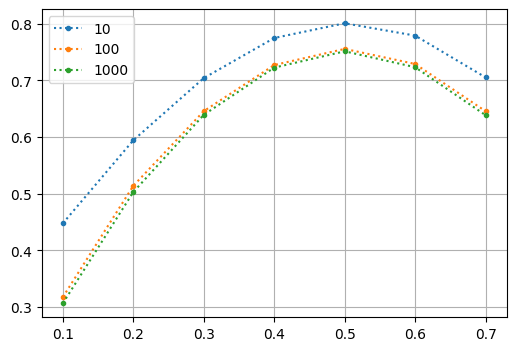

In [19]:
plt.plot(prob_zero_values, eff_10, '.:', label='10')
plt.plot(prob_zero_values, eff_100, '.:', label='100')
plt.plot(prob_zero_values, eff_1000, '.:', label='1000')
plt.grid()
plt.legend()
plt.show()

In [21]:
more_prob_values = [0.02*i for i in range(1, 30)]
more_eff_10000 = [compression_efficiency_avg(1000, p, N_samples=N_SAMPLES) for p in more_prob_values]

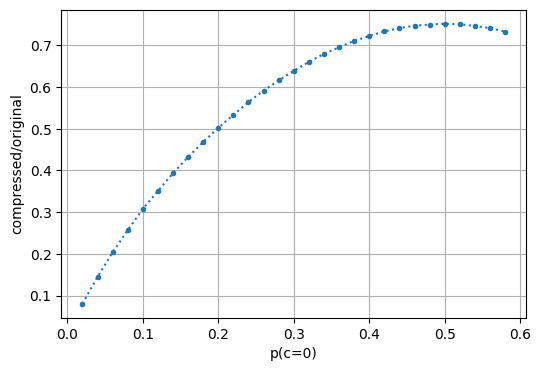

In [22]:
plt.plot(more_prob_values, more_eff_10000, '.:')
plt.xlabel('p(c=0)')
plt.ylabel('compressed/original')
plt.grid()
plt.show()

# Math

Find the expression for the compression efficiency $E(N)$ of a sequence of length $N$.

Find the limit 
$$E^* := \lim_{N\rightarrow\infty} E(N)$$

# Bit Streams Stats
Consider this problem first.

Say, how many consequent 0s or 1s of length $k$ ($s_k$) are there in a bitstream of length $N$? 

Probability that there are no $s_k$ in a bitstream of length $N$.

(Theory + simulation.)